## Analyze Supermarket Data Across the Country - Company XYZ


#### This project aims to develop actionable growth strategy for Company XYZ, which owns a supermarket chain across the country, by understanding and analysing sales records got across its branches.

### Step 1 - Loading the Dataset

In [1]:
import os
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')  
import warnings
warnings.filterwarnings('ignore')
import glob
import pandas as pd
import numpy as np

In [2]:
url_1 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Abuja_Branch.csv'
url_2 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Lagos_Branch.csv'
url_3 = 'https://raw.githubusercontent.com/Ustacky-dev/Pandas-Analytics-Project/main/Port_Harcourt_Branch.csv'

In [3]:
dfa =  pd.read_csv(url_1)
dfl = pd.read_csv(url_2)
dfp = pd.read_csv(url_3)

In [4]:
dfa.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,692-92-5582,B,Abuja,Member,Female,Food and beverages,19742.4,3,2961.36,62188.56,2/20/2019,13:27,Card,59227.2,4.761905,2961.36,5.9
1,351-62-0822,B,Abuja,Member,Female,Fashion accessories,5212.8,4,1042.56,21893.76,2/6/2019,18:07,Epay,20851.2,4.761905,1042.56,4.5
2,529-56-3974,B,Abuja,Member,Male,Electronic accessories,9183.6,4,1836.72,38571.12,3/9/2019,17:03,Cash,36734.4,4.761905,1836.72,6.8
3,299-46-1805,B,Abuja,Member,Female,Sports and travel,33739.2,6,10121.76,212556.96,1/15/2019,16:19,Cash,202435.2,4.761905,10121.76,4.5
4,319-50-3348,B,Abuja,Normal,Female,Home and lifestyle,14508.0,2,1450.80,30466.80,3/11/2019,15:30,Epay,29016.0,4.761905,1450.80,4.4


In [5]:
dfl.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [6]:
dfp.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,226-31-3081,C,Port Harcourt,Normal,Female,Electronic accessories,5500.8,5,1375.20,28879.20,3/8/2019,10:29,Cash,27504.0,4.761905,1375.20,9.6
1,699-14-3026,C,Port Harcourt,Normal,Male,Electronic accessories,30740.4,7,10759.14,225941.94,3/25/2019,18:30,Epay,215182.8,4.761905,10759.14,4.1
2,315-22-5665,C,Port Harcourt,Normal,Female,Home and lifestyle,26481.6,10,13240.80,278056.80,2/24/2019,11:38,Epay,264816.0,4.761905,13240.80,8.0
3,300-71-4605,C,Port Harcourt,Member,Male,Electronic accessories,30974.4,5,7743.60,162615.60,2/25/2019,11:24,Epay,154872.0,4.761905,7743.60,4.8
4,183-56-6882,C,Port Harcourt,Member,Female,Food and beverages,35791.2,4,7158.24,150323.04,2/6/2019,10:42,Epay,143164.8,4.761905,7158.24,7.5


In [7]:
df = pd.concat([dfl, dfa, dfp], axis = 0)

### Step 2 - Data Exploration

In [8]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8


In [9]:
df.shape   #We checkout the number of rows and columns in the combined dataset

(1000, 17)

In [10]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [67]:
df['Product line'].unique()  

array(['Health and beauty', 'Home and lifestyle', 'Sports and travel',
       'Electronic accessories', 'Food and beverages',
       'Fashion accessories'], dtype=object)

#### With a the statisical summary of the set, we can get a little insight on the dataset before going into the data cleaning and analysis

In [11]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000
mean,20041.966800,5.510000,5536.572840,116268.029640,110731.456800,4.761905e+00,5536.572840,6.97270
std,9538.066205,2.923431,4215.177173,88518.720636,84303.543463,6.131498e-14,4215.177173,1.71858
min,3628.800000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.00000
25%,11835.000000,3.000000,2132.955000,44792.055000,42659.100000,4.761905e+00,2132.955000,5.50000
50%,19882.800000,5.000000,4351.680000,91385.280000,87033.600000,4.761905e+00,4351.680000,7.00000
75%,28056.600000,8.000000,8080.290000,169686.090000,161605.800000,4.761905e+00,8080.290000,8.50000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.00000


In [12]:
dfl.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,340.000000,340.000000
mean,19721.107059,5.467647,5354.640529,112447.451118,107092.810588,4.761905e+00,5354.640529,7.027059
std,9407.565699,2.859876,3970.971849,83390.408832,79419.436983,1.778975e-14,3970.971849,1.731345
min,3628.800000,1.000000,217.620000,4570.020000,4352.400000,4.761905e+00,217.620000,4.000000
25%,11610.000000,3.000000,2356.965000,49496.265000,47139.300000,4.761905e+00,2356.965000,5.600000
50%,19164.600000,5.000000,4128.480000,86698.080000,82569.600000,4.761905e+00,4128.480000,7.100000
75%,27034.200000,8.000000,7874.415000,165362.715000,157488.300000,4.761905e+00,7874.415000,8.500000
max,35938.800000,10.000000,17816.400000,374144.400000,356328.000000,4.761905e+00,17816.400000,10.000000


In [13]:
dfa.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,332.000000,332.000000,332.000000,332.000000,332.000000,3.320000e+02,332.000000,332.000000
mean,20037.339759,5.481928,5483.528675,115154.102169,109670.573494,4.761905e+00,5483.528675,6.818072
std,9440.841216,2.896446,4156.243972,87281.123420,83124.879448,1.601134e-14,4156.243972,1.713719
min,3812.400000,1.000000,319.500000,6709.500000,6390.000000,4.761905e+00,319.500000,4.000000
25%,11988.000000,3.000000,2056.050000,43177.050000,41121.000000,4.761905e+00,2056.050000,5.300000
50%,19746.000000,5.000000,4335.120000,91037.520000,86702.400000,4.761905e+00,4335.120000,6.700000
75%,27720.900000,8.000000,7981.470000,167610.870000,159629.400000,4.761905e+00,7981.470000,8.200000
max,35985.600000,10.000000,17528.400000,368096.400000,350568.000000,4.761905e+00,17528.400000,10.000000


In [14]:
dfp.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,328.000000,328.000000,328.000000,328.000000,328.000000,3.280000e+02,328.000000,328.000000
mean,20379.248780,5.582317,5778.852256,121355.897378,115577.045122,4.761905e+00,5778.852256,7.072866
std,9784.727668,3.021724,4511.329199,94737.913170,90226.583971,1.512210e-14,4511.329199,1.704526
min,3657.600000,1.000000,183.060000,3844.260000,3661.200000,4.761905e+00,183.060000,4.000000
25%,12156.300000,3.000000,2082.420000,43730.820000,41648.400000,4.761905e+00,2082.420000,5.600000
50%,20451.600000,6.000000,4652.910000,97711.110000,93058.200000,4.761905e+00,4652.910000,7.100000
75%,29358.900000,8.000000,8498.655000,178471.755000,169973.100000,4.761905e+00,8498.655000,8.500000
max,35985.600000,10.000000,17874.000000,375354.000000,357480.000000,4.761905e+00,17874.000000,10.000000


##### NB: From the statistical summary above, It can be observed that each locations have same gross margin percentage of about 4.76%. Inorder to increase profit margin, operational cost has to be reviewed across all branches especially in Port harcourt branch.

In [15]:
df.isnull().sum() # to look out for null values 

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 327
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## Step 3 - Dealing with DateTime Features

In [17]:
df['datetime'] = df['Date'].astype(str) + " " + df['Time'].astype(str)  ## combined the date and time column to create a 'datetime' column

In [18]:
df['datetime'] = pd.to_datetime(df['datetime']) ##changed the datatype to a datetime format

In [19]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,1/5/2019,13:08,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,3/3/2019,13:23,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,1/27/2019,20:33,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2/8/2019,10:37,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2/25/2019,14:36,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00


In [20]:
df['Date'] = pd.to_datetime(df['Date'])

In [21]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,datetime
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,2019-01-05,13:08,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,2019-03-03,13:23,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,2019-01-27,20:33,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,2019-02-08,10:37,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,2019-02-25,14:36,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00


In [22]:
df['Day'] = df['datetime'].dt.day

In [23]:
df['Month'] = df['datetime'].dt.month

In [24]:
df['Year'] = df['datetime'].dt.year

In [25]:
df['Hour'] = df['datetime'].dt.hour

In [26]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Payment,cogs,gross margin percentage,gross income,Rating,datetime,Day,Month,Year,Hour
0,750-67-8428,A,Lagos,Member,Female,Health and beauty,26888.4,7,9410.94,197629.74,...,Epay,188218.8,4.761905,9410.94,9.1,2019-01-05 13:08:00,5,1,2019,13
1,631-41-3108,A,Lagos,Normal,Male,Home and lifestyle,16678.8,7,5837.58,122589.18,...,Card,116751.6,4.761905,5837.58,7.4,2019-03-03 13:23:00,3,3,2019,13
2,123-19-1176,A,Lagos,Member,Male,Health and beauty,20959.2,8,8383.68,176057.28,...,Epay,167673.6,4.761905,8383.68,8.4,2019-01-27 20:33:00,27,1,2019,20
3,373-73-7910,A,Lagos,Normal,Male,Sports and travel,31071.6,7,10875.06,228376.26,...,Epay,217501.2,4.761905,10875.06,5.3,2019-02-08 10:37:00,8,2,2019,10
4,355-53-5943,A,Lagos,Member,Female,Electronic accessories,24782.4,6,7434.72,156129.12,...,Epay,148694.4,4.761905,7434.72,5.8,2019-02-25 14:36:00,25,2,2019,14


### Step 4 - Unique Values in Columns

In [27]:
df['Hour'].nunique()

11

In [28]:
df['Hour'].unique()

array([13, 20, 10, 14, 17, 16, 19, 11, 18, 12, 15], dtype=int64)

In [29]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object" ]
categorical_columns

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Time',
 'Payment']

In [30]:
df['Branch'].unique().tolist()

['A', 'B', 'C']

In [31]:
print("Total Number of unique values in the Branch Column : {}". format(len(df['Branch'].unique().tolist())))

Total Number of unique values in the Branch Column : 3


In [32]:
df['City'].unique().tolist()

['Lagos', 'Abuja', 'Port Harcourt']

In [33]:
print("Total Number of unique values in the City Column : {}". format(len(df['City'].unique().tolist())))

Total Number of unique values in the City Column : 3


In [34]:
df['Customer type'].unique().tolist()

['Member', 'Normal']

In [35]:
print("Total Number of unique values in the Customer type Column : {}". format(len(df['Customer type'].unique().tolist())))

Total Number of unique values in the Customer type Column : 2


In [36]:
df['Gender'].unique().tolist()

['Female', 'Male']

In [37]:
print("Total Number of unique values in the Gender type Column : {}". format(len(df['Gender'].unique().tolist())))

Total Number of unique values in the Gender type Column : 2


In [38]:
df['Product line'].unique().tolist()

['Health and beauty',
 'Home and lifestyle',
 'Sports and travel',
 'Electronic accessories',
 'Food and beverages',
 'Fashion accessories']

In [39]:
print("Total Number of unique values in the Product line  Column : {}". format(len(df['Product line'].unique().tolist())))

Total Number of unique values in the Product line  Column : 6


In [40]:
df['Payment'].unique().tolist()

['Epay', 'Card', 'Cash']

In [41]:
print("Total Number of unique values in the Payment Column : {}". format(len(df['Payment'].unique().tolist())))

Total Number of unique values in the Payment Column : 3


In [42]:
df['City'].value_counts()

Lagos            340
Abuja            332
Port Harcourt    328
Name: City, dtype: int64

### Step 5 - Aggregration with GroupBy

In [43]:
city = df.groupby('City')

In [44]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'datetime', 'Day', 'Month', 'Year', 'Hour'],
      dtype='object')

In [45]:
city_income= city.agg({'gross margin percentage':['sum', 'mean'], 'gross income':['sum', 'mean']})

In [46]:
city_income

gross margin percentage           gross income             
                                  sum      mean          sum         mean
City                                                                     
Abuja                     1580.952381  4.761905   1820531.52  5483.528675
Lagos                     1619.047619  4.761905   1820577.78  5354.640529
Port Harcourt             1561.904762  4.761905   1895463.54  5778.852256

##### It can be observed from the table above that Port Harcourt had the total gross income 

In [47]:
city_income['gross income'].idxmax()

sum     Port Harcourt
mean    Port Harcourt
dtype: object

In [48]:
df.groupby(['City'])['Unit price'].mean()

City
Abuja            20037.339759
Lagos            19721.107059
Port Harcourt    20379.248780
Name: Unit price, dtype: float64

##### From the table the Port Harcourt is seen to have the highest unit price for products

In [49]:
df.groupby(['City'])['Quantity'].sum()

City
Abuja            1820
Lagos            1859
Port Harcourt    1831
Name: Quantity, dtype: int64

##### Lagos has the highest quantity of products sold

### Step 5: Data Visualization

In [50]:
sns.set_style('darkgrid')

<AxesSubplot:title={'center':'Table 1.0: Counterplot showing branches with highest sales record'}, xlabel='count', ylabel='City'>

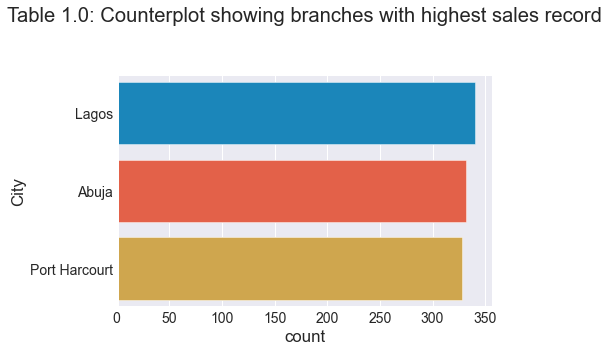

In [51]:
sns.countplot(y='Branch', data = df).set_title("Table 1.0: Counterplot showing branches with highest sales record", y=1.2)
sns.countplot(y='City', data = df)


Text(0.5, 1.2, 'Table 2.0: Countplot showing payment channel used by most customer')

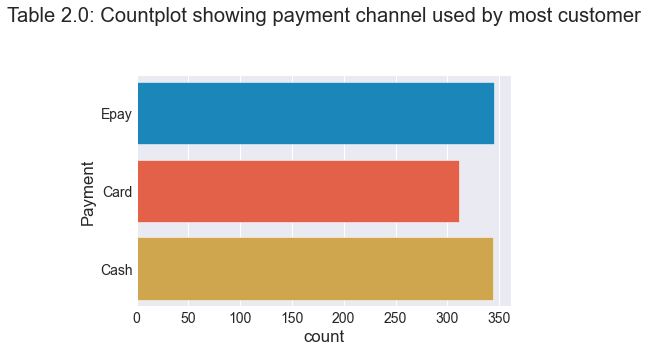

In [52]:
sns.countplot(y='Payment', data = df).set_title('Table 2.0: Countplot showing payment channel used by most customer', y=1.2)


Text(0.5, 1.2, 'Tale 3.0: Countplot showing highest and lowest sold product line')

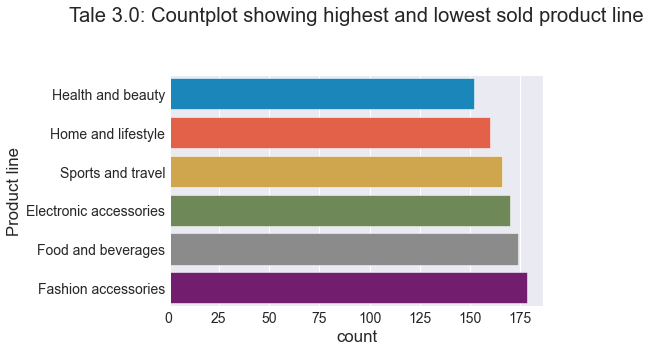

In [53]:
sns.countplot(y='Product line', data = df).set_title('Tale 3.0: Countplot showing highest and lowest sold product line', y=1.2)

Text(0.5, 1.2, 'Table 4.0: Countplot showing payment channel used by most customers to pay for each product line')

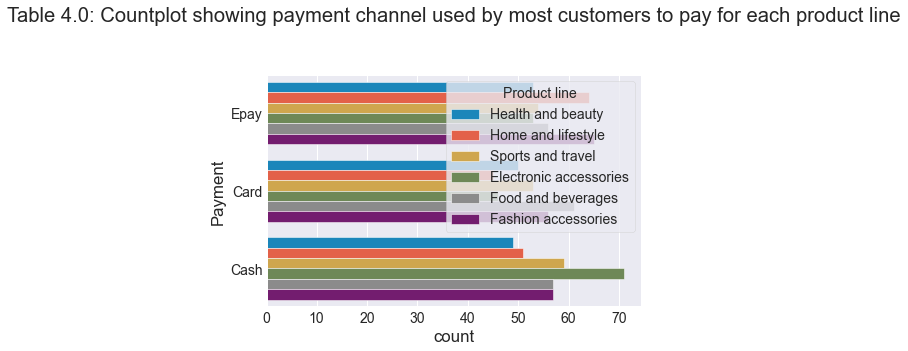

In [54]:
sns.countplot(y='Payment', data = df, hue = 'Product line').set_title('Table 4.0: Countplot showing payment channel used by most customers to pay for each product line', y=1.2)

Text(0.5, 1.2, 'Table 5.0: Countplot showing Payment channel for each Branch')

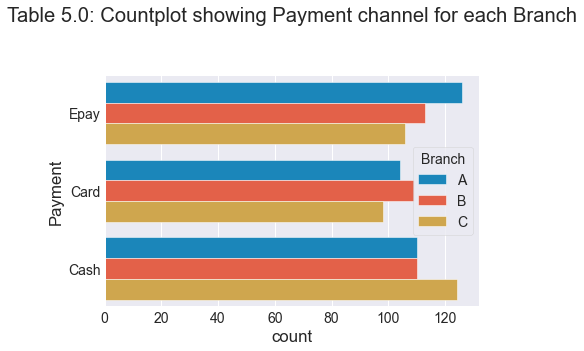

In [55]:
sns.countplot(y='Payment', data = df, hue= 'Branch').set_title("Table 5.0: Countplot showing Payment channel for each Branch", y=1.2)

Text(0.5, 1.2, 'Table 6.0: Boxplot showing statistical summary of each Branch ratings')

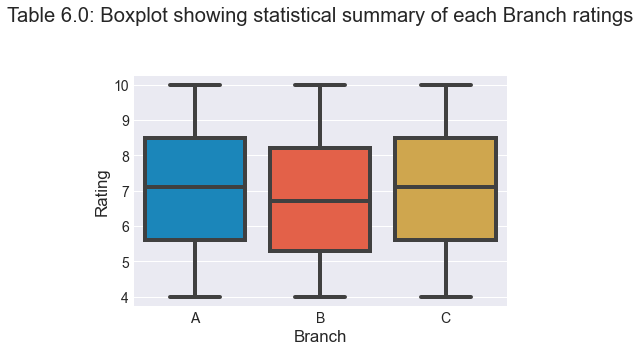

In [56]:
sns.boxplot(x='Branch', y= 'Rating', data=df).set_title('Table 6.0: Boxplot showing statistical summary of each Branch ratings', y=1.2)

#### B Branch(Abuja) is seen to be the least rated branch.

Text(0.5, 1.1, 'Table 7.0: Quantity of Product line purchased based on Gender category')

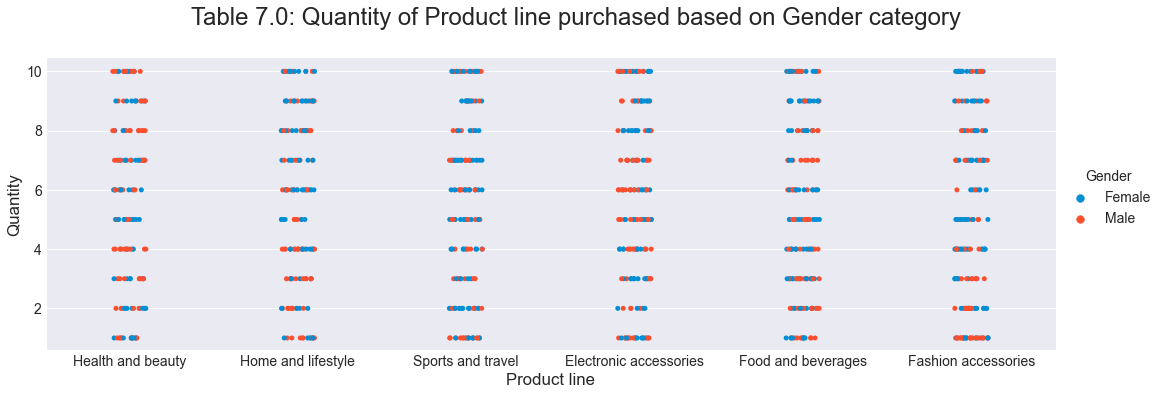

In [57]:
sns.catplot(x= 'Product line', y= 'Quantity', data=df, hue='Gender', aspect = 3).fig.suptitle("Table 7.0: Quantity of Product line purchased based on Gender category", y=1.1,
                  fontsize=24, fontdict={"weight": "bold"}) 


Text(0.5, 1.1, 'Table 8.0: Total income generated on each Product line based on Gender category')

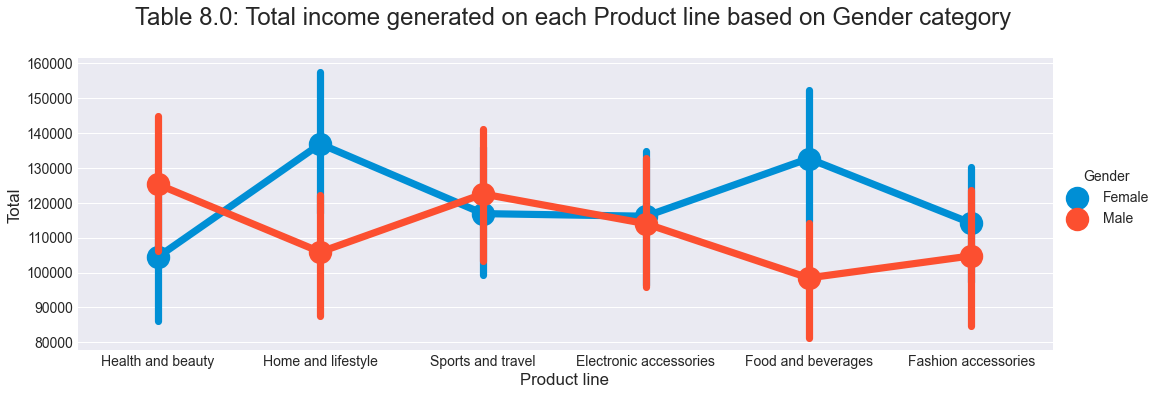

In [58]:
sns.catplot(x= 'Product line', y= 'Total', data=df, hue='Gender', kind='point', aspect = 3).fig.suptitle("Table 8.0: Total income generated on each Product line based on Gender category", y=1.1,
                  fontsize=24, fontdict={"weight": "bold"}) 

#### From the table above, we have more males purchasing 'health and beauty products', and 'sports and travel materials'. We can also observe more females in the home and lifestyle category, food and beverages category, fashion accessories and surprisingly in the electronic accessories. Inorder to leverage on this, companyXYZ can focus marketing of products on certain group of individuals.
#### Sales record can also go as far as including age groups so as to take advantage of the various platforms especially social media to gain more audience.

Text(0.5, 1.1, 'Table 9.1: A Catplot showing Product line per Quantity ')

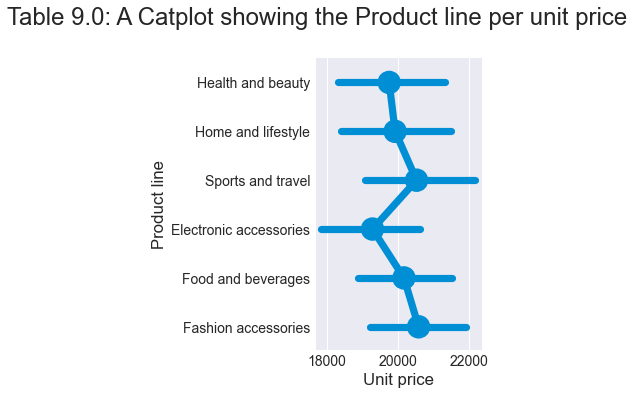

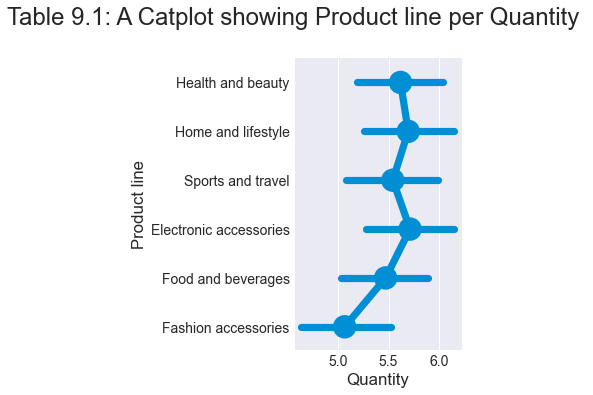

In [59]:
sns.catplot(x= 'Unit price', y='Product line', data=df, kind= 'point').fig.suptitle("Table 9.0: A Catplot showing the Product line per unit price", y=1.1,
                  fontsize=24, fontdict={"weight": "bold"}) 
sns.catplot(x='Quantity', y= 'Product line', data=df, kind = 'point').fig.suptitle("Table 9.1: A Catplot showing Product line per Quantity ", y=1.1,
                  fontsize=24, fontdict={"weight": "bold"}) 

#### From Table 9.0 and 9.1, the sport and travel category is seen to have the highest unit price, with electronic accessories, the lowest unit price.  We also have more electronic accessories and home and lifestyle products being purchached more compared to fashion accessories. The price for fashion accessories can also be reviewed as it might be the reason why its the least purchased quantiity of goods.

Text(0.5, 1.2, 'Table 10.0: Bar chart showing gross income generated by each supermarket location')

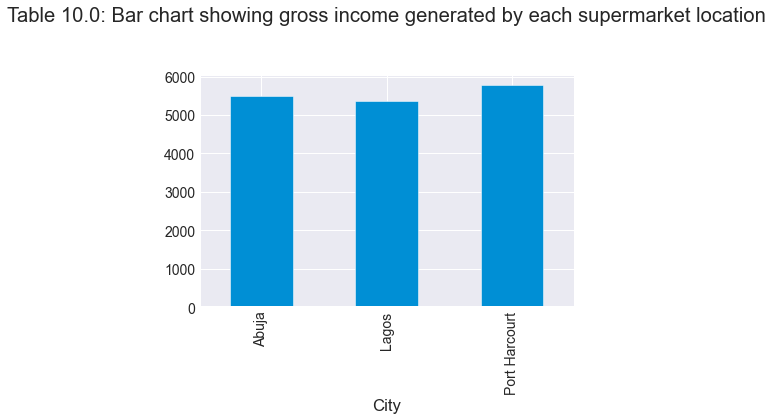

In [60]:
df.groupby(['City'])['gross income'].mean().plot.bar().set_title('Table 10.0: Bar chart showing gross income generated by each supermarket location', y=1.2)

Text(0.5, 1.2, 'Table 10.1: Bar chart showing gross margin percentage generated by each supermarket location')

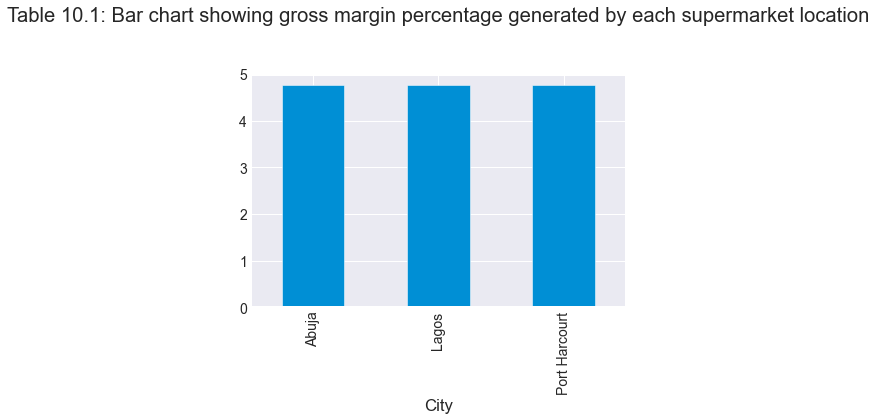

In [68]:
df.groupby(['City'])['gross margin percentage'].mean().plot.bar().set_title('Table 10.1: Bar chart showing gross margin percentage generated by each supermarket location', y=1.2)

Text(0.5, 1.2, 'Table 10.2: Barchart showing the cost of goods in all Supermarket locations')

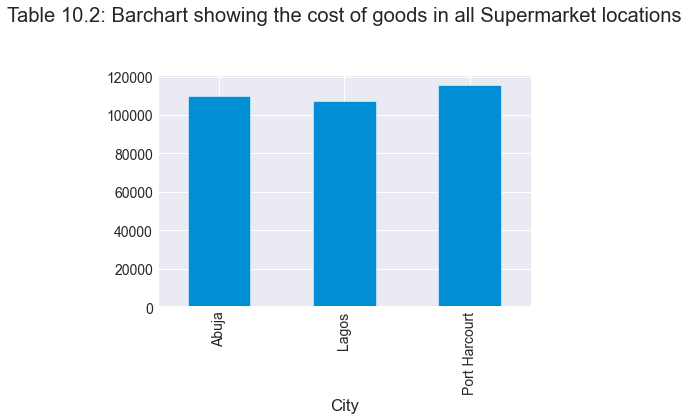

In [62]:
df.groupby(['City'])['cogs'].mean().plot.bar().set_title('Table 10.2: Barchart showing the cost of goods in all Supermarket locations', y=1.2)

#### From the tables above it is seen that the cost of goods in portharcourt is higher compared to other locations, but still, same profit margin is got with other locations in Lagos and Abuja. 